<a href="https://colab.research.google.com/github/knotseaborg/Machine-Learning-Projects/blob/master/regression_boilerplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Scripts

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
path = "/content/sample_data/california_housing_train.csv"

In [0]:
data = pd.read_csv(path)
print(data.info())
print("Dimension",data.shape)
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB
None
Dimension (17000, 9)
   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]


##Correlation matrix

In [0]:
def plotDataAndCov(dataframe):
    data = dataframe.values
    ACov = np.corrcoef(data, rowvar=False)

    plt.figure(figsize=(7,7))
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    plot = sns.heatmap(ACov, cmap=cmap, vmin=0, xticklabels=list(dataframe.columns), yticklabels=list(dataframe.columns))
    
    plt.show()

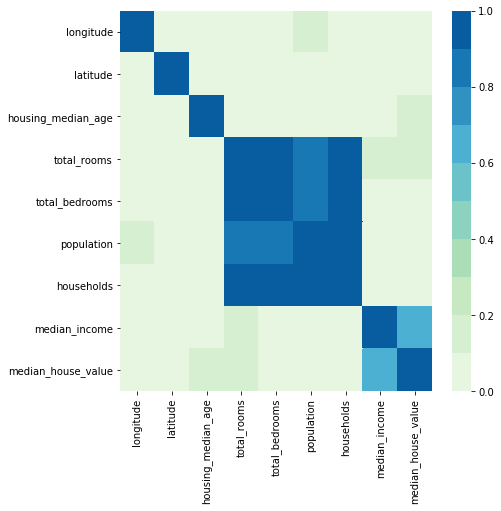

In [0]:
plotDataAndCov(data)

##Variance Inflation Factor

In [0]:
X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(dataframe):
  for i in range(dataframe.shape[1]):
    print(dataframe.columns[i], variance_inflation_factor(dataframe.values, i))

In [0]:
get_vif(X_data)

longitude 615.2686727416177
latitude 549.5301768173555
housing_median_age 7.271744137810967
total_rooms 30.044819679121968
total_bedrooms 96.65600180683796
population 16.638519418723856
households 96.28443539535213
median_income 8.253099168306262


##Centering values to zero

In [0]:
def centralize(series):
  return series.apply(lambda x: x-series.mean())

#centralized_data = X_train.apply(centralize)

##Stardizing values

In [0]:
def standardize(series):
  return series.apply(lambda x: (x-series.mean())/series.std())

#standardized_data = X_train.apply(standardize)

##Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_data.apply(centralize), y_data, test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_data.apply(standardize), y_data, test_size=0.2)

##Lasso regression

###Centralized data

In [0]:
from sklearn.linear_model import Lasso

lm_c = Lasso(alpha=0.1)
lm_c.fit(X_train_c.values, y_train_c.values)
score_c = lm.score(X_train_c.values, y_train_c.values)
_y_c = lm_c.predict(X_test)

###Standardized data

In [0]:
from sklearn.linear_model import Lasso

lm_s = Lasso(alpha=0.1)
lm_s.fit(X_train_s.values, y_train_s.values)
score_s = lm.score(X_train_s.values, y_train_s.values)
_y_s = lm_s.predict(X_test)

##Cross validation

In [0]:
from sklearn.model_selection import cross_val_score

cross_val_score(lm_c, X_test_c.values, y_test_c.values, cv=5)

In [0]:
from sklearn.model_selection import cross_val_score

cross_val_score(lm_s, X_test_s.values, y_test_s.values, cv=5)

##Residual plot

In [0]:
def plot_residue(y, _y):
    plt.figure(figsize=(7,7))
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    plot = sns.scatterplot(x=y, y=y-_y, palette=cmap)
    
    plt.show()

In [0]:
plot_residue(y_test_c, _y_c)

In [0]:
plot_residue(y_test_s, _y_s)

##Q-Q plot

In [0]:
def plot_qq(y, _y):
  
  y = list(map(lambda x: (x-np.mean(y))/np.std(y), y))
  _y = list(map(lambda x: (x-np.mean(_y))/np.std(_y), _y))

  percs = np.linspace(0,100,25)
  qn_x = np.percentile(y, percs)
  qn_y = np.percentile(_y, percs)
  
  plt.figure()
  plt.xlim(np.min((qn_x.min(),qn_y.min())), np.max((qn_x.max(),qn_y.max())))
  plt.ylim(np.min((qn_x.min(),qn_y.min())), np.max((qn_x.max(),qn_y.max())))
  plt.scatter(x=qn_x, y=qn_y)
  
  base_line = np.linspace(np.min((qn_x.min(),qn_y.min())), np.max((qn_x.max(),qn_y.max())))
  plt.plot(base_line, base_line, color="black", ls="--")
  plt.show()

In [0]:
plot_qq(y_test_c, _y_c)

##Automatic outlier removal

In [0]:
from scipy import stats

def remove_outlier(dataframe):
  return dataframe[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

##Column distribution

In [0]:
def column_distribution(dataframe, column):
  plt.figure()
  
  sns.distplot(dataframe[column])
  
  plt.show()

In [0]:
column_distribution(X_train_s, 'longitude')

##Grid search CV

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':np.linspace(0.001, 0.1, 100)}
clf = GridSearchCV(lm_c, parameters, cv=5)
clf.fit(X_train_c, y_train_c)

In [0]:
sorted(clf.cv_results_)

In [0]:
clf.predict(X_test_c)

##Accuracy metric (MSE)

In [0]:
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(X_test_c)
y_true = y_test_c

mean_squared_error(y_true, y_pred)

In [0]:
clfx = Lasso()
#cols = ["latitude","housing_median_age", "total_rooms","median_income"]
#clf.fit(X_train_c[cols].values, y_train_c.values)
#clf.score(X_test_c[cols].values, y_test_c.values)

parameters = {'alpha':np.linspace(0.1, 10, 50)}
clf = GridSearchCV(clfx, parameters, cv=5)
clf.fit(X_train_c[cols], y_train_c)

clf.cv_results_['mean_test_score']